## IMPORTS

In [198]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime

In [199]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Collecting 

In [200]:
symbols = ["AAPL",'NFLX','GOOG','MCD','BVB.DE']
start_date = "2018-03-09"
end_date = datetime.today().strftime('%Y-%m-%d')

df = yf.download(symbols, start=start_date, end=end_date)
print(f'Your data will be collecting the day {start_date} until {end_date} that date.')

[*********************100%***********************]  5 of 5 completed
Your data will be collecting the day 2018-03-09 until 2023-03-13 that date.


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293 entries, 2018-03-09 to 2023-03-10
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, AAPL)    1260 non-null   float64
 1   (Adj Close, BVB.DE)  1271 non-null   float64
 2   (Adj Close, GOOG)    1260 non-null   float64
 3   (Adj Close, MCD)     1260 non-null   float64
 4   (Adj Close, NFLX)    1260 non-null   float64
 5   (Close, AAPL)        1260 non-null   float64
 6   (Close, BVB.DE)      1271 non-null   float64
 7   (Close, GOOG)        1260 non-null   float64
 8   (Close, MCD)         1260 non-null   float64
 9   (Close, NFLX)        1260 non-null   float64
 10  (High, AAPL)         1260 non-null   float64
 11  (High, BVB.DE)       1271 non-null   float64
 12  (High, GOOG)         1260 non-null   float64
 13  (High, MCD)          1260 non-null   float64
 14  (High, NFLX)         1260 non-null   float64
 15  (Low, AAPL)         

Each row of the table contains the opening, high, low, closing, adjusted closing price and trading volume of Apple stock on a given date (DatetimeIndex).

The columns in the dataset are:

Open: The opening price of the stock that day.
High: The highest price of the stock that day.
Low: The lowest price of the stock that day.
Close: The closing price of the stock that day.
Adj Close: The adjusted closing price of the stock that day (taking into account stock splits, dividends, etc.).
Volume: The number of shares traded that day.
As an example, we can access the data of a row in the dataset

In [202]:
df.head()

Adj Close                                                   Close  \
                 AAPL    BVB.DE       GOOG         MCD        NFLX       AAPL   
Date                                                                            
2018-03-09  42.894684  5.651509  58.001999  139.775177  331.440002  44.994999   
2018-03-12  43.309376  5.710687  58.224998  140.219620  321.299988  45.430000   
2018-03-13  42.892300  5.651509  56.908501  140.646317  315.880005  44.992500   
2018-03-14  42.527660  5.676167  57.474499  140.664124  321.549988  44.610001   
2018-03-15  42.577698  5.676167  57.479000  143.659805  321.089996  44.662498   

                                                      ...       Open         \
           BVB.DE       GOOG         MCD        NFLX  ...       AAPL BVB.DE   
Date                                                  ...                     
2018-03-09  5.730  58.001999  157.240005  331.440002  ...  44.490002   5.82   
2018-03-12  5.790  58.224998  157.740005  321.299988  ...  45.072498   5.76   
2018-03-13  5.730  56.908501  158.220001  315.880005  ...  45.647499   5.79   
2018-03-14  5.755  57.474499  158.240005  321.549988  ...  45.080002   5.74   
2018-03-15  5.755  57.479000  161.610001  321.089996  ...  44.625000   5.76   

                                                    Volume            \
                 GOOG         MCD        NFLX         AAPL    BVB.DE   
Date                                                                   
2018-03-09  56.799999  155.619995  321.329987  128740800.0  806820.0   
2018-03-12  58.192501  157.740005  333.559998  128828400.0  282486.0   
2018-03-13  58.500000  158.559998  323.869995  126774000.0  261562.0   
2018-03-14  57.260502  159.000000  318.160004  117473600.0  106483.0   
2018-03-15  57.498001  158.710007  323.170013   90975200.0  133318.0   

                                               
                  GOOG        MCD        NFLX  
Date                                           
2018-03-09  42560000.0  5076500.0  14500200.0  
2018-03-12  43446000.0  4461500.0  20369200.0  
2018-03-13  38144000.0  4333100.0  12917200.0  
2018-03-14  25828000.0  3879000.0  10475100.0  
2018-03-15  27908000.0  5925700.0   5642900.0  

[5 rows x 30 columns]

In [203]:
df.describe()

Adj Close                                                      \
              AAPL       BVB.DE         GOOG          MCD         NFLX   
count  1260.000000  1271.000000  1260.000000  1260.000000  1260.000000   
mean    100.480590     6.073681    87.418122   203.103578   390.518571   
std      46.140076     1.855812    30.710814    38.494125   117.063059   
min      34.257282     3.034000    48.811001   127.965637   166.369995   
25%      51.159002     4.377000    59.419250   172.366173   309.212502   
50%     112.349464     5.780000    76.422253   200.296661   362.809998   
75%     144.166458     7.842948   113.294878   235.911728   494.352501   
max     180.683868     9.922196   150.709000   275.251587   691.690002   

             Close                                                      ...  \
              AAPL       BVB.DE         GOOG          MCD         NFLX  ...   
count  1260.000000  1271.000000  1260.000000  1260.000000  1260.000000  ...   
mean    101.832220     6.098662    87.418122   214.434206   390.518571  ...   
std      45.828481     1.877902    30.710814    33.981916   117.063059  ...   
min      35.547501     3.034000    48.811001   137.100006   166.369995  ...   
25%      52.620001     4.377000    59.419250   186.357498   309.212502  ...   
50%     113.996246     5.800000    76.422253   213.434998   362.809998  ...   
75%     145.324997     7.905000   113.294878   242.985004   494.352501  ...   
max     182.009995    10.060000   150.709000   278.399994   691.690002  ...   

              Open                                                      \
              AAPL       BVB.DE         GOOG          MCD         NFLX   
count  1260.000000  1271.000000  1260.000000  1260.000000  1260.000000   
mean    101.750897     6.111067    87.378723   214.422421   390.570063   
std      45.806207     1.877749    30.738582    33.991136   117.304062   
min      35.994999     3.054000    48.695000   135.199997   163.960007   
25%      52.721875     4.350000    59.462251   186.120003   309.032501   
50%     114.246250     5.820000    76.330750   213.669998   362.830002   
75%     144.380005     7.930000   113.240875   243.107506   495.000000   
max     182.630005    10.230000   151.863495   281.489990   692.349976   

             Volume                                                          
               AAPL        BVB.DE          GOOG           MCD          NFLX  
count  1.260000e+03  1.271000e+03  1.260000e+03  1.260000e+03  1.260000e+03  
mean   1.137025e+08  2.892019e+05  3.084783e+07  3.305423e+06  8.085700e+06  
std    5.416308e+07  2.342933e+05  1.338926e+07  1.581265e+06  6.831575e+06  
min    3.519590e+07  0.000000e+00  6.936000e+06  1.047700e+06  1.144000e+06  
25%    7.740915e+07  1.505745e+05  2.236350e+07  2.388150e+06  4.392025e+06  
50%    9.862135e+07  2.298450e+05  2.756500e+07  2.951800e+06  6.329350e+06  
75%    1.335626e+08  3.510240e+05  3.512000e+07  3.723175e+06  9.666025e+06  
max    4.265100e+08  2.701343e+06  1.241400e+08  1.766210e+07  1.333875e+08  

[8 rows x 30 columns]

In [204]:
# Show closing prices for a specific date range
start_date = "2022-06-01"
end_date = "2022-07-01"
closing_prices = df.loc[start_date:end_date, "Close"]
print(closing_prices)


                  AAPL  BVB.DE        GOOG         MCD        NFLX
Date                                                              
2022-06-01  148.710007   4.118  114.137001  249.279999  192.910004
2022-06-02  151.210007   4.118  117.746002  250.380005  205.089996
2022-06-03  145.380005   4.118  114.564003  248.360001  198.979996
2022-06-06  146.139999   4.098  117.010498  248.070007  197.139999
2022-06-07  148.710007   4.136  117.229500  248.940002  198.610001
2022-06-08  147.960007   4.076  117.237999  245.610001  202.830002
2022-06-09  142.639999   3.998  114.917999  242.160004  192.770004
2022-06-10  137.130005   3.840  111.427498  237.380005  182.940002
2022-06-13  131.880005   3.638  106.876503  238.470001  169.690002
2022-06-14  132.759995   3.590  107.194000  238.759995  167.539993
2022-06-15  135.429993   3.698  110.390503  238.899994  180.110001
2022-06-16  130.059998   3.526  106.636002  235.190002  173.350006
2022-06-17  131.559998   3.580  107.865501  234.380005  175.50

In [205]:
# Show volume for a specific date range
start_date = "2022-06-01"
end_date = "2022-06-30"
volume = df.loc[start_date:end_date, "Volume"]
print(volume)


                   AAPL    BVB.DE        GOOG        MCD        NFLX
Date                                                                
2022-06-01   74286600.0  173836.0  28630000.0  2264100.0   8416200.0
2022-06-02   72348100.0       0.0  27472000.0  2089700.0   9623100.0
2022-06-03   88570300.0       0.0  25052000.0  1838900.0   7191800.0
2022-06-06   71598400.0  120686.0  23786000.0  1569300.0   5372000.0
2022-06-07   67808200.0  260300.0  26414000.0  2782000.0   4839500.0
2022-06-08   53950200.0  225289.0  22544000.0  2101300.0   7244100.0
2022-06-09   69473000.0  160572.0  23142000.0  2682600.0   6949000.0
2022-06-10   91437900.0  249352.0  31324000.0  1992300.0  13065600.0
2022-06-13  122207100.0  469140.0  36756000.0  4697000.0  10222400.0
2022-06-14   84784300.0  367106.0  25480000.0  3564800.0  11555300.0
2022-06-15   91533000.0  263304.0  33192000.0  3152100.0  12396000.0
2022-06-16  108123900.0  265393.0  35314000.0  3272000.0   8201300.0
2022-06-17  134520300.0  292469.0 

## Visual Analyses 


Change of prices over time: This analysis can be done to understand how prices change over time. This can be done by creating a time series of closing prices. You can visualize these time series charts by plotting or by doing trendline analysis. For example:

The code plots the time series of stock closing prices.

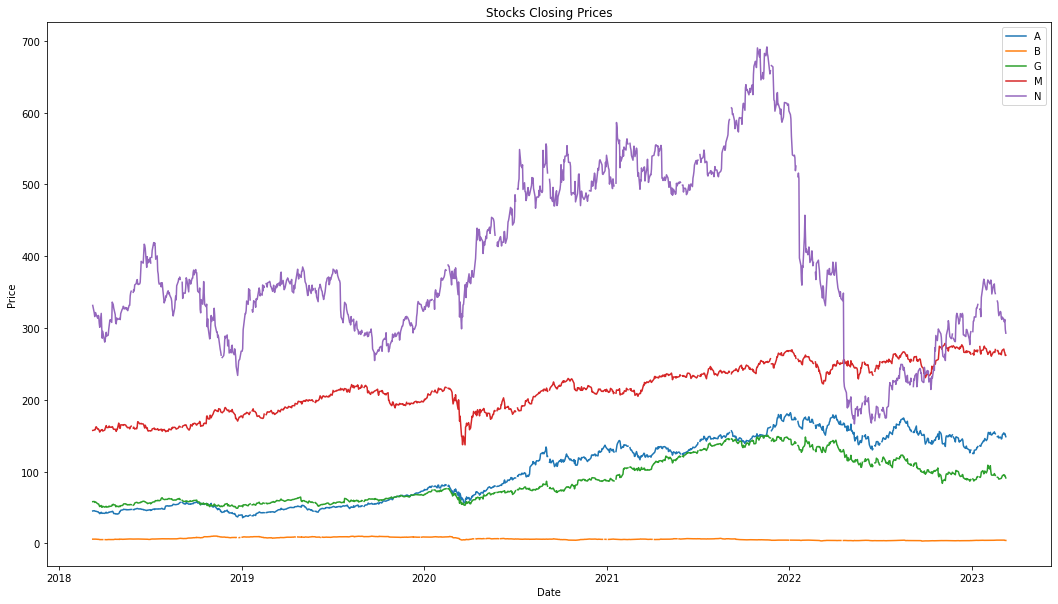

In [206]:
import matplotlib.pyplot as plt

closing_prices = df["Close"]
fig, ax = plt.subplots(figsize=(18,10))
ax.set_title("Stocks Closing Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

# Yılları 4 haneli olarak yazdır
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Plot tüm hisse senetlerinin kapanış fiyatları
for col in closing_prices.columns:
    ax.plot(closing_prices.index, closing_prices[col], label=col[0])

# Etiketleri göster
ax.legend()

plt.show()


Volume trends: This analysis can be done to understand how stock trading volume changes over time. This can be done by creating a time series of trading volume. You can visualize these time series charts by plotting or by doing trendline analysis. For example

This code plots the time series of stock trading volume.


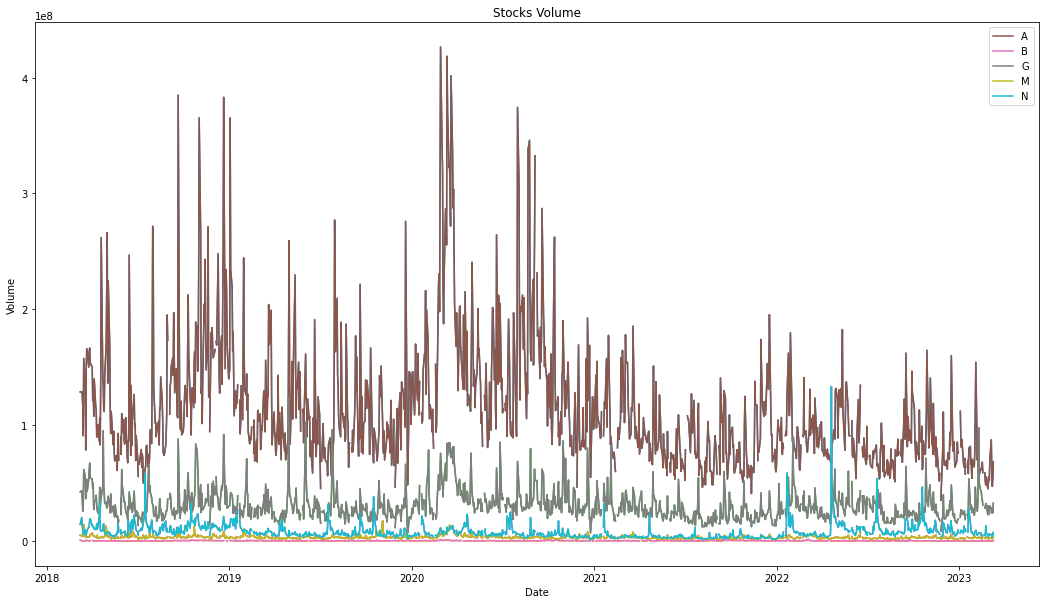

In [207]:
volume = df["Volume"]
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(volume)
ax.set_title("Stocks Volume")
ax.set_xlabel("Date")
ax.set_ylabel("Volume")

# it will writes the year in 4 chrachters 
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
# Plot tüm hisse senetlerinin kapanış fiyatları

for col in volume.columns:
    ax.plot(volume.index, volume[col], label=col[0])

# Etiketleri göster
ax.legend()

plt.show()


Price and volume relationship: This analysis can be done to understand the relationship between price and volume. For example, higher trading volume is often associated with changes in prices. To do this analysis, you can visualize the relationship between both variables by plotting prices and volumes on the same chart. For example


This code plots stock closing prices and trading volume on the same chart.

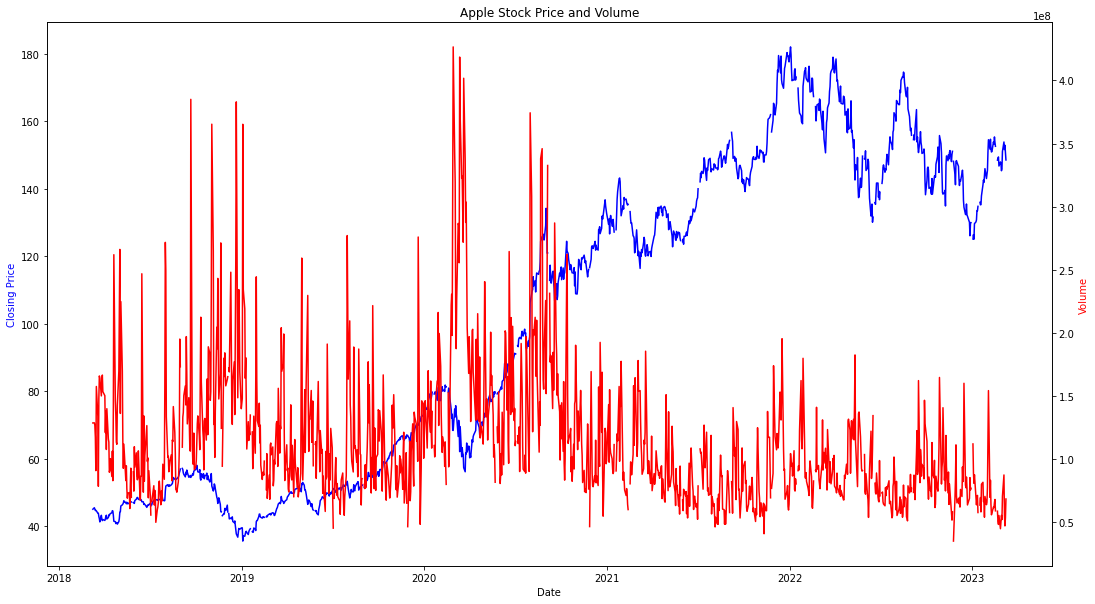

In [208]:
fig, ax1 = plt.subplots(figsize=(18,10))
# plot the closing prices 
closing_prices = df['Close']['AAPL']

ax1.plot(closing_prices, 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='b')

# plot the volume 
volume = df['Volume']['AAPL']

ax2 = ax1.twinx()
ax2.plot(volume, 'r-')
ax2.set_ylabel('Volume', color='r')

plt.title("Apple Stock Price and Volume")

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

plt.show()


Analysis of price movements: This analysis can be done to understand price movements. For example, by calculating the moving average of prices, you can understand trends or fluctuations. For example:

This code plots a moving average graph of stock closing prices.

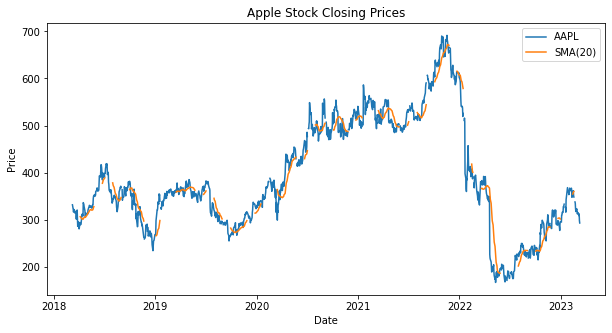

In [209]:
closing_prices = df["Close"]['NFLX']
window_size = 20
sma = closing_prices.rolling(window=window_size).mean()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(closing_prices, label="AAPL")
ax.plot(sma, label=f"SMA({window_size})")
ax.set_title("Apple Stock Closing Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

# it will writes the year in 4 chrachters 
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

ax.legend()
plt.show()


In [210]:
df.to_csv("AAPL.csv")

In [211]:
df

Adj Close                                               \
                  AAPL    BVB.DE       GOOG         MCD        NFLX   
Date                                                                  
2018-03-09   42.894684  5.651509  58.001999  139.775177  331.440002   
2018-03-12   43.309376  5.710687  58.224998  140.219620  321.299988   
2018-03-13   42.892300  5.651509  56.908501  140.646317  315.880005   
2018-03-14   42.527660  5.676167  57.474499  140.664124  321.549988   
2018-03-15   42.577698  5.676167  57.479000  143.659805  321.089996   
...                ...       ...        ...         ...         ...   
2023-03-06  153.830002  4.396000  95.580002  270.640015  312.029999   
2023-03-07  151.600006  4.394000  94.169998  267.130005  308.470001   
2023-03-08  152.869995  4.028000  94.650002  265.329987  311.790009   
2023-03-09  150.589996  4.000000  92.660004  261.630005  297.779999   
2023-03-10  148.500000  3.934000  91.010002  262.029999  292.760010   

                 Close                                            ...  \
                  AAPL BVB.DE       GOOG         MCD        NFLX  ...   
Date                                                              ...   
2018-03-09   44.994999  5.730  58.001999  157.240005  331.440002  ...   
2018-03-12   45.430000  5.790  58.224998  157.740005  321.299988  ...   
2018-03-13   44.992500  5.730  56.908501  158.220001  315.880005  ...   
2018-03-14   44.610001  5.755  57.474499  158.240005  321.549988  ...   
2018-03-15   44.662498  5.755  57.479000  161.610001  321.089996  ...   
...                ...    ...        ...         ...         ...  ...   
2023-03-06  153.830002  4.396  95.580002  270.640015  312.029999  ...   
2023-03-07  151.600006  4.394  94.169998  267.130005  308.470001  ...   
2023-03-08  152.869995  4.028  94.650002  265.329987  311.790009  ...   
2023-03-09  150.589996  4.000  92.660004  261.630005  297.779999  ...   
2023-03-10  148.500000  3.934  91.010002  262.029999  292.760010  ...   

                  Open                                                 Volume  \
                  AAPL BVB.DE       GOOG         MCD        NFLX         AAPL   
Date                                                                            
2018-03-09   44.490002  5.820  56.799999  155.619995  321.329987  128740800.0   
2018-03-12   45.072498  5.760  58.192501  157.740005  333.559998  128828400.0   
2018-03-13   45.647499  5.790  58.500000  158.559998  323.869995  126774000.0   
2018-03-14   45.080002  5.740  57.260502  159.000000  318.160004  117473600.0   
2018-03-15   44.625000  5.760  57.498001  158.710007  323.170013   90975200.0   
...                ...    ...        ...         ...         ...          ...   
2023-03-06  153.789993  4.372  94.360001  269.149994  317.000000   87558000.0   
2023-03-07  153.699997  4.398  95.419998  271.519989  312.679993   56182000.0   
2023-03-08  152.809998  4.240  94.404999  265.859985  309.290009   47204800.0   
2023-03-09  153.559998  4.030  94.489998  267.089996  312.079987   53833600.0   
2023-03-10  150.210007  3.900  92.500000  263.730011  297.899994   68524400.0   

                                                         
              BVB.DE        GOOG        MCD        NFLX  
Date                                                     
2018-03-09  806820.0  42560000.0  5076500.0  14500200.0  
2018-03-12  282486.0  43446000.0  4461500.0  20369200.0  
2018-03-13  261562.0  38144000.0  4333100.0  12917200.0  
2018-03-14  106483.0  25828000.0  3879000.0  10475100.0  
2018-03-15  133318.0  27908000.0  5925700.0   5642900.0  
...              ...         ...        ...         ...  
2023-03-06  174486.0  28288200.0  2217600.0   5660700.0  
2023-03-07  210340.0  24101500.0  2766600.0   4553100.0  
2023-03-08  771658.0  25395200.0  2314000.0   3479500.0  
2023-03-09  473009.0  24438900.0  2339300.0   7443400.0  
2023-03-10  158043.0  32831700.0  3091300.0   5753800.0  

[1293 rows x 30 columns]

## Analyses  

In [212]:
returns = df.pct_change()

In [213]:
returns.tail()

Adj Close                                             Close  \
                AAPL    BVB.DE      GOOG       MCD      NFLX      AAPL   
Date                                                                     
2023-03-06  0.018539  0.011971  0.016592  0.005835 -0.009994  0.018539   
2023-03-07 -0.014496 -0.000455 -0.014752 -0.012969 -0.011409 -0.014496   
2023-03-08  0.008377 -0.083295  0.005097 -0.006738  0.010763  0.008377   
2023-03-09 -0.014915 -0.006951 -0.021025 -0.013945 -0.044934 -0.014915   
2023-03-10 -0.013879 -0.016500 -0.017807  0.001529 -0.016858 -0.013879   

                                                    ...      Open            \
              BVB.DE      GOOG       MCD      NFLX  ...      AAPL    BVB.DE   
Date                                                ...                       
2023-03-06  0.011971  0.016592  0.005835 -0.009994  ...  0.038841  0.017217   
2023-03-07 -0.000455 -0.014752 -0.012969 -0.011409  ... -0.000585  0.005947   
2023-03-08 -0.083295  0.005097 -0.006738  0.010763  ... -0.005790 -0.035925   
2023-03-09 -0.006951 -0.021025 -0.013945 -0.044934  ...  0.004908 -0.049528   
2023-03-10 -0.016500 -0.017807  0.001529 -0.016858  ... -0.021816 -0.032258   

                                            Volume                      \
                GOOG       MCD      NFLX      AAPL    BVB.DE      GOOG   
Date                                                                     
2023-03-06  0.017468  0.002720  0.004914  0.238996 -0.065260 -0.063952   
2023-03-07  0.011234  0.008805 -0.013628 -0.358345  0.205484 -0.148002   
2023-03-08 -0.010637 -0.020846 -0.010842 -0.159788  2.668622  0.053677   
2023-03-09  0.000900  0.004627  0.009021  0.140426 -0.387022 -0.037657   
2023-03-10 -0.021060 -0.012580 -0.045437  0.272893 -0.665877  0.343420   

                                
                 MCD      NFLX  
Date                            
2023-03-06 -0.186441 -0.048414  
2023-03-07  0.247565 -0.195665  
2023-03-08 -0.163594 -0.235795  
2023-03-09  0.010933  1.139215  
2023-03-10  0.321464 -0.226993  

[5 rows x 30 columns]

In [214]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

Adj Close                                             Close  \
                      AAPL    BVB.DE      GOOG       MCD      NFLX      AAPL   
Adj Close AAPL    0.109298  0.027775  0.071951  0.035745  0.075382  0.109325   
          BVB.DE  0.027775  0.137861  0.027816  0.024193  0.023997  0.027761   
          GOOG    0.071951  0.027816  0.098535  0.031750  0.075231  0.071951   
          MCD     0.035745  0.024193  0.031750  0.055316  0.024578  0.035727   
          NFLX    0.075382  0.023997  0.075231  0.024578  0.219167  0.075485   
Close     AAPL    0.109325  0.027761  0.071951  0.035727  0.075485  0.109378   
          BVB.DE  0.027792  0.137839  0.027816  0.024174  0.023985  0.027778   
          GOOG    0.071951  0.027816  0.098535  0.031750  0.075231  0.071951   
          MCD     0.035698  0.024361  0.031738  0.055388  0.024579  0.035679   
          NFLX    0.075382  0.023997  0.075231  0.024578  0.219167  0.075485   
High      AAPL    0.066143  0.025970  0.036785  0.019772  0.034115  0.066193   
          BVB.DE  0.011635  0.075281  0.014532  0.016234  0.010711  0.011628   
          GOOG    0.038971  0.027970  0.060601  0.016687  0.036763  0.038981   
          MCD     0.017256  0.022317  0.015042  0.033085  0.007366  0.017235   
          NFLX    0.034915  0.021036  0.034463  0.006415  0.139772  0.034950   
Low       AAPL    0.069091  0.030662  0.042798  0.022036  0.042800  0.069125   
          BVB.DE  0.015229  0.094344  0.016761  0.019282  0.016757  0.015184   
          GOOG    0.043862  0.030224  0.064148  0.019030  0.043306  0.043836   
          MCD     0.018457  0.025193  0.017050  0.033976  0.009925  0.018421   
          NFLX    0.038571  0.026959  0.038444  0.011320  0.142197  0.038619   
Open      AAPL    0.041861  0.025477  0.021239  0.014284  0.017720  0.041885   
          BVB.DE  0.004363  0.033601  0.006261  0.011651  0.006115  0.004364   
          GOOG    0.025057  0.028737  0.035142  0.012935  0.017381  0.025056   
          MCD     0.010626  0.023128  0.009720  0.017180 -0.000212  0.010604   
          NFLX    0.020705  0.021668  0.018947  0.008624  0.075698  0.020728   
Volume    AAPL   -0.115923 -0.161162 -0.162456 -0.076532 -0.224405 -0.115613   
          BVB.DE -0.064744 -0.875286  0.040635 -0.087643 -0.117165 -0.062440   
          GOOG   -0.246044 -0.101764 -0.193431 -0.114786 -0.203731 -0.244802   
          MCD    -0.081408 -0.171325 -0.073135 -0.025238 -0.110850 -0.081032   
          NFLX   -0.109731 -0.005804 -0.046463 -0.091328 -0.155590 -0.109091   

                                                          ...      Open  \
                    BVB.DE      GOOG       MCD      NFLX  ...      AAPL   
Adj Close AAPL    0.027792  0.071951  0.035698  0.075382  ...  0.041861   
          BVB.DE  0.137839  0.027816  0.024361  0.023997  ...  0.025477   
          GOOG    0.027816  0.098535  0.031738  0.075231  ...  0.021239   
          MCD     0.024174  0.031750  0.055388  0.024578  ...  0.014284   
          NFLX    0.023985  0.075231  0.024579  0.219167  ...  0.017720   
Close     AAPL    0.027778  0.071951  0.035679  0.075485  ...  0.041885   
          BVB.DE  0.137836  0.027816  0.024341  0.023985  ...  0.025478   
          GOOG    0.027816  0.098535  0.031738  0.075231  ...  0.021239   
          MCD     0.024341  0.031738  0.055592  0.024579  ...  0.014412   
          NFLX    0.023985  0.075231  0.024579  0.219167  ...  0.017720   
High      AAPL    0.025971  0.036785  0.019777  0.034115  ...  0.068466   
          BVB.DE  0.075300  0.014532  0.016419  0.010711  ...  0.025420   
          GOOG    0.027957  0.060601  0.016699  0.036763  ...  0.041941   
          MCD     0.022316  0.015042  0.033276  0.007366  ...  0.022074   
          NFLX    0.021019  0.034463  0.006361  0.139772  ...  0.041788   
Low       AAPL    0.030660  0.042798  0.022075  0.042800  ...  0.071290   
          BVB.DE  0.094350  0.016761  0.019508  0.016757  ...  0.029739   
          GOOG    0.030212  0.0